In [ ]:
import numpy as np
import cv2
from tensorflow import keras

In [ ]:
def mask_label(pred):
    if(pred>0.5):
        return 'NO MASK'
    else:
        return 'MASK'
def color_label(pred):
    if(pred>0.5):
        return (0,0,255)
    else:
        return (0,255,0)
# dist_label = {1:(0,255,0),0:(255,0,0)}

In [3]:
model = keras.models.load_model('MaskXception.h5')

In [ ]:
cap = cv2.VideoCapture(0)

In [ ]:
s=80
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    img = cv2.resize(frame,(s,s))
    image = np.reshape(img,[1,s,s,3])/255.0
    predict=model.predict(image)
    cv2.putText(frame,mask_label(predict),(10, 50),cv2.FONT_HERSHEY_TRIPLEX,2,color_label(predict),2) 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [5]:
s=80

In [21]:
from PIL import Image
im = Image.open("trika.jpg")
im.save("trika.png", "PNG")

'MASK'

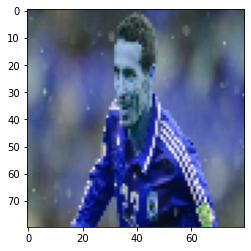

In [23]:
import matplotlib.pyplot as plt
img =cv2.imread('./trika.png')
img = cv2.resize(img,(s,s))
plt.imshow(img)
image = np.reshape(img,[1,s,s,3])/255.0
predict=model.predict(image)
mask_label(predict)